Le but de ce travail est de trouver les équations lagrangiennes du pendule double et de les résoudre en utilisant la méthode numérique Runge Kutta 4.
Les deux barreaux ont une masse m et une longueur l. Commençons par écrire la position du centre de masse de chacun des barreaux:

$$x_1 = \frac{l}{2}sin(\theta _1)$$   

$$\dot{x_1} = \frac{l}{2}cos(\theta _1)\dot{\theta _1}$$

$$y_1 = -\frac{l}{2}cos(\theta _1)$$  

$$\dot{y_1} = \frac{l}{2}sin(\theta _1)\dot{\theta _1}$$

$$x_2 = lsin(\theta _1) + \frac{l}{2}sin(\theta _2)$$ 

$$\dot{x_2} = lcos(\theta _1)\dot{\theta _1} + \frac{l}{2}cos(\theta _2)\dot{\theta _2}$$

$$y_2 = -lcos(\theta _1) - \frac{l}{2}cos(\theta _2)$$ 

$$\dot{y_2} = lsin(\theta _1)\dot{\theta _1} + \frac{l}{2}sin(\theta _2)\dot{\theta _2}$$

Le lagrangien s'exprime de la manière suivante:

$$L = T - V = \frac{1}{2}m(\dot{x_1}^2+\dot{x_2}^2+\dot{y_1}^2+\dot{y_2}^2)+\frac{1}{2}I(\dot{\theta _1}^2+\dot{\theta_2}^2)-mg(y_1+y_2)$$

où T représente l'énergie cinétique des barreaux, V l'énergie potentielle.
Le moment d'inertie I de chaque barreau par rapport à son centre de masse vaut $I = \frac{1}{12}ml^2$

En utilisant les dérivées de $x_1, y_1, x_2$ et $y_2$ obtenues ci-dessus, nous avons

$$\dot{x_1}^2 + \dot{y_1}^2 = \frac{l^2}{4}\dot{\theta _1}^2$$

$$\dot{x_2}^2 + \dot{y_2}^2 = l^2\dot{\theta_1}^2 + \frac{l^2}{4}\dot{\theta _2}^2+l^2\dot{\theta _1}\dot{\theta _2}cos(\theta _1-\theta _2)$$

Le lagrangien s'écrit donc 

$$L = \frac{1}{2}m\left ( \frac{l^2}{4}\dot{\theta _1}^2+l^2\dot{\theta_1}^2 + \frac{l^2}{4}\dot{\theta _2}^2+l^2\dot{\theta _1}\dot{\theta _2}cos(\theta _1-\theta _2) \right ) + \frac{1}{2}\left ( \frac{ml^2}{12} \right )\left ( \dot{\theta _1}^2+\dot{\theta_2}^2 \right )-mg(-\frac{l}{2}cos\theta _1-lcos\theta_1-\frac{l}{2}cos\theta _2)$$

Après simplification des termes, le lagrangien final est donné par

$$L = \frac{1}{6}ml^2\left ( 4\dot{\theta _1}^2+\dot{\theta _2 }^2 +3\dot{\theta _1}\dot{\theta _2}cos(\theta _1-\theta _2)\right ) +mg\frac{l}{2}\left ( 3cos\theta _1+cos\theta _2 \right )$$

Les impulsions $p_1$ et $p_2$ s'obtiennent à partir de ce lagrangien en utilisant la formule suivante:

$$p_1 = \frac{\partial L}{\partial \dot{\theta _1}} = \frac{1}{6}ml^2(8\dot{\theta _1}+ 3\dot{\theta _2}cos(\theta _1-\theta _2))$$

$$p_2 = \frac{\partial L}{\partial \dot{\theta _2}} = \frac{1}{6}ml^2(2\dot{\theta _2}+ 3\dot{\theta _1}cos(\theta _1-\theta _2))$$

En inversant ces deux relations, nous obtenons 

$$\dot{\theta _1}=\frac{6}{ml^2}\frac{2p_1-3cos(\theta _1-\theta _2)p_2}{16-9cos^2(\theta _1-\theta _2)}$$

$$\dot{\theta _2}=\frac{6}{ml^2}\frac{8p_2-3cos(\theta _1-\theta _2)p_1}{16-9cos^2(\theta _1-\theta _2)}$$

Il nous reste à dériver le langrangien par rapport aux angles $\theta _1$ et $\theta _2$. Cela nous donne les équations pour $p_1$ et $p_2$

$$\dot{p_1}=\frac{\partial L}{\partial \theta _1}=-\frac{1}{2}ml^2(\dot{\theta _1}\dot{\theta _2}sin(\theta _1-\theta _2)+\frac{3g}{l}sin\theta _1)$$

$$\dot{p_2}=\frac{\partial L}{\partial \theta _2}=-\frac{1}{2}ml^2(-\dot{\theta _1}\dot{\theta _2}sin(\theta _1-\theta _2)+\frac{g}{l}sin\theta _2)$$

Ce sont ces quatre dernières équations que nous devrons résoudre numériquement afin d'obtenir les angles $\theta _1$ et $\theta _2$ à chaque instant, et par conséquent la position des barreaux à chaque instant.


In [8]:
import math
import numpy
from matplotlib import pyplot
from matplotlib import animation
from IPython.display import HTML
def DoublePendRK4(th1,th2,p1,p2,m,l,g,T,step):
    t=0
    #On stocke les 4 conditions initiales dans un vecteur u
    u=[th1,th2,p1,p2]
    #On définit une matrice (n+1)x4, dans laquelle nous allons stocker les données
    n=int(T / step)
    P=numpy.zeros([n+1,4])
    P[0]=[ ((l/2)*math.sin(th1))*2,(-(l/2)*math.cos(th1))*2,(l*math.sin(th1) + (l/2)*math.sin(th2))+(l/2)*math.sin(th2),(-l*math.cos(th1) - (l/2)*math.cos(th2)-(l/2)*math.cos(th2)) ]
    i=1
    #On définit les 4 équations que nous allons résoudre en utilisant RK4
    def function(u,m, l, g):
        th1,th2,p1,p2=u
        ff = numpy.array([(6/(m*(l**2)))*(((2*p1)-(3*math.cos(th1-th2))*p2)/(16-9*(math.cos(th1-th2))**2)),
                           (6/(m*(l**2)))*(((8*p2)-(3*math.cos(th1-th2))*p1)/(16-9*(math.cos(th1-th2))**2)),
                           (-0.5*m*(l**2))*((((6/(m*(l**2)))*(((2*p1)-(3*math.cos(th1-th2))*p2)/(16-9*(math.cos(th1-th2))**2)))*((6/(m*(l**2)))*(((8*p2)-(3*math.cos(th1-th2))*p1)/(16-9*(math.cos(th1-th2))**2)))*math.sin(th1-th2))+(3*(g/l)*math.sin(th1))),
                           (-0.5*m*(l**2))*((-((6/(m*(l**2)))*(((2*p1)-(3*math.cos(th1-th2))*p2)/(16-9*(math.cos(th1-th2))**2)))*((6/(m*(l**2)))*(((8*p2)-(3*math.cos(th1-th2))*p1)/(16-9*(math.cos(th1-th2))**2)))*math.sin(th1-th2))+((g/l)*math.sin(th2)))])
        return ff
    #On utilise RK4
    while (t+step)<=T:
        #On définit les 4 constantes
        k1 = function(u,m, l, g)
        k2 = function(u+((step/2)*k1),m, l, g)
        k3 = function(u+((step/2)*k2),m, l, g)
        k4 = function(u+(step*k3),m, l, g)
        #On modifie les données dans le vecteur u
        u=u+step*(k1+2*k2+2*k3+k4)/6
        # On passe au prochain step
        t = t + step
        #On arrondit la valeurs de t afin d'éviter les erreurs de stockage 
        t=round(t,10)
        #On transforme les angles et impulsions en les positions des extrémités de chaque barreau
        th1,th2,p1,p2=u
        P[i]=[ ((l/2)*math.sin(th1))*2,(-(l/2)*math.cos(th1))*2,(l*math.sin(th1) + (l/2)*math.sin(th2))+(l/2)*math.sin(th2),(-l*math.cos(th1) - (l/2)*math.cos(th2)-(l/2)*math.cos(th2)) ]
        i=i+1
    return (P)
P=(DoublePendRK4((math.pi)/2,(math.pi)/2,0,0,1,1,9.81,20,0.001))
print(P)

[[ 1.00000000e+00 -6.12323400e-17  2.00000000e+00 -1.22464680e-16]
 [ 1.00000000e+00 -6.30642857e-06  2.00000000e+00 -4.20428571e-06]
 [ 1.00000000e+00 -2.52257143e-05  2.00000000e+00 -1.68171429e-05]
 ...
 [ 6.60271564e-01 -7.51026938e-01  5.16728288e-02  4.24512150e-02]
 [ 6.61484510e-01 -7.49958828e-01  5.58801538e-02  4.58070700e-02]
 [ 6.62689457e-01 -7.48894307e-01  6.00911896e-02  4.91503832e-02]]


Les positions des extrémités de chaque barreau après 20 secondes valent donc :

In [13]:
print('x1 ={:.9f}'.format(P[-1][0]))
print('y1 ={:.9f}'.format(P[-1][1]))
print('x2 ={:.9f}'.format(P[-1][2]))
print('y2 ={:.9f}'.format(P[-1][3]))

x1 =0.662689457
y1 =-0.748894307
x2 =0.060091190
y2 =0.049150383


Nous allons à présent estimer l'ordre de convergence de notre méthode

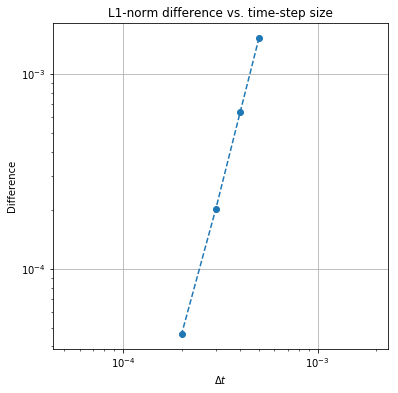

In [3]:
#On créé une liste vide
P_values = []
#On génère une liste contenant différents 'step'
dt_values = [0.0005,0.0004,0.0003, 0.0002, 0.0001]
#On remplit la liste P_values avec les solutions correspondant aux différents 'step'
for step in (dt_values):
    a=DoublePendRK4((math.pi)/2,(math.pi)/2,0,0,1,1,9.81,20,step)
    P_values.append(a)

#Les matrices correspondant au step plus raffiné contiennent plus lignes, pour cela nous devons "sauter" quelques lignes de ces matrices afin de pouvoir les soustraire avec les autres
def l1_diff(P_coarse, P_fine, dt):
    N_coarse = len(P_coarse)       #On évalue la longueur de la liste correspondant à la matrice avec le step plus raffiné
    N_fine = len(P_fine)           #On évalue la longueur de la liste correspondant à la matrice avec le step moins raffiné
    ratio = math.ceil(N_fine / N_coarse)    #On obtient le ratio en divisant le nombre de lignes de la matrice avec le step plus raffiné par le nombre de lignes de la matrice avec le step moins raffiné
    diff = dt * numpy.sum(numpy.abs(P_coarse - P_fine[::ratio]))
    return diff

diff_values = []

#On utilise la fonction l1_diff(P_coarse, P_fine, dt) afin de comparer la différence entre les solutions pour le step le plus raffiné (0.0001), et celles pour le step moins raffiné
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(P_values[i][:, 2], P_values[-1][:, 2], dt)
    diff_values.append(diff)
    
#On implémente dans un graphique    
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')
pyplot.xlabel('$\Delta t$') 
pyplot.ylabel('Difference') 
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')
pyplot.axis('equal'); 

Nous voyons que la différence diminue significativement lorsqu'on augmente le step

In [36]:
#On définit une autre liste 
r = 2
h = 0.00011
dt_values2 = [h, r*h, (r**2)*h]
P_values2 = []

for step in (dt_values2):
    b=DoublePendRK4((math.pi)/2,(math.pi)/2,0,0,1,1,9.81,20,step)
    P_values2.append(b)

#On applique la formule de l'ordre de convergence
f2_f1 = l1_diff(P_values2[1][:, 2], P_values2[0][:, 2], dt_values2[1])
f3_f2 = l1_diff(P_values2[2][:, 2], P_values2[1][:, 2], dt_values2[2])
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))


Observed order of convergence: p = 3.886


L'ordre de convergence est proche de 4, qui est l'ordre de convergence de la méthode numérique Runge Kutta 4.


Nous allons représenter l'évolution de la position des barreaux au cours du temps grâce à une animation graphique.

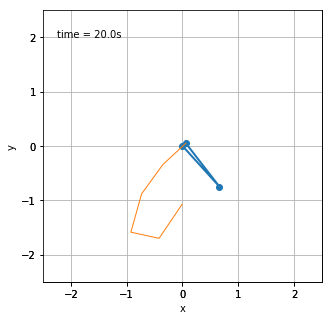

In [38]:
T=20
step=0.001
n=int(T / step)
#On génère le graphique
fig = pyplot.figure(figsize=(5.0, 5.0))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(-2.5, 2.5)
pyplot.ylim(-2.5, 2.5)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.grid()

#On définit le type de ligne
line, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], '-', lw=1)
#On définit le texte correspondant au temps dans le coin supérieur gauche du graphique
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

tailx = []
taily = []

#On définit l'animation
def animate(i):
    #On définit différents vecteurs
    Pendulex = [0, P[i][0], P[i][2]]
    Penduley = [0, P[i][1], P[i][3]]
    a = [P[i][2]]
    b = [P[i][3]]
    #On ajoute a et b aux listes tailx et taily
    tailx.append(a)
    taily.append(b)
    #Ici, on supprime les éléments des listes tailx et tailxy si on dépasse la ligne (0.3/h) de la matrice P
    if i>(0.3/step):
        tailx.pop(0)
        taily.pop(0)

    #On fait "évoluer les lignes" en utilisant les données obtenues précédemment (on anime line1 et line2)
    line.set_data(Pendulex, Penduley)
    line2.set_data(tailx, taily)
    #On fait évoluer le texte correspondant au temps
    time_text.set_text(time_template % (i*step))
    return line, time_text, line2

ani = animation.FuncAnimation(fig, animate, numpy.arange(0,n+1,100),
                              interval=100,blit=True)

HTML(ani.to_html5_video())

Afin de résoudre les équations du mouvement du pendule double, nous avons utilisé la méthode numérique Runge Kutta 4.
La résolution des équations du mouvement nous permet de constater que le pendule double décrit un mouvement chaotique (avec les paramètres et conditions initiales données), comme nous pouvons le voir dans l'animation ci-dessus. Nous avons de plus estimé l'ordre de convergence de cette méthode. Le résultat obtenu est 3.886, qui est proche de la valeur attendue (4). 
Enfin, pour différentes valeurs du "step", nous avons comparé les positions des pendules et établi un graphique qui nous permet de voir que la différence entre les solutions diminue significativement si le step devient plus raffiné.



In [ ]:
6.62689457e-01 m \\
    &y_1 =  -7.48894307e-01 m\\
    &x_2 =  6.00911896e-02 m \\
    &y_2 =  4.91503832e-02 m \\